In [1]:
# Comparative Stock Analysis for Multiple Companies

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
bajaj = pd.read_csv("Bajaj Auto.csv")
tvs = pd.read_csv("TVS Motors.csv")
eicher = pd.read_csv("Eicher Motors.csv")
hero = pd.read_csv("Hero Motocorp.csv")
infosys = pd.read_csv("Infosys.csv")
tcs = pd.read_csv("TCS.csv")


In [2]:
# Preprocess
for df in [bajaj, tvs, eicher, hero, infosys, tcs]:
    df['Date'] = pd.to_datetime(df['Date'], format='%d-%B-%Y')
    df.sort_values('Date', inplace=True)
    df.reset_index(drop=True, inplace=True)
    df.fillna(method='ffill', inplace=True)

In [3]:
# Extract only Date and Close Price with renaming
bajaj = bajaj[['Date', 'Close Price']].rename(columns={'Close Price': 'Bajaj Auto'})
tvs = tvs[['Date', 'Close Price']].rename(columns={'Close Price': 'TVS Motors'})
eicher = eicher[['Date', 'Close Price']].rename(columns={'Close Price': 'Eicher Motors'})
hero = hero[['Date', 'Close Price']].rename(columns={'Close Price': 'Hero Motocorp'})
infosys = infosys[['Date', 'Close Price']].rename(columns={'Close Price': 'Infosys'})
tcs = tcs[['Date', 'Close Price']].rename(columns={'Close Price': 'TCS'})

In [4]:
# Merge on Date
merged_df = bajaj.merge(tvs, on='Date', how='inner')
merged_df = merged_df.merge(eicher, on='Date', how='inner')
merged_df = merged_df.merge(hero, on='Date', how='inner')
merged_df = merged_df.merge(infosys, on='Date', how='inner')
merged_df = merged_df.merge(tcs, on='Date', how='inner')

In [5]:
# Normalize for comparison (Indexing to 1 at the start)
norm_df = merged_df.copy()
for col in norm_df.columns[1:]:
    norm_df[col] = norm_df[col] / norm_df[col].iloc[0]

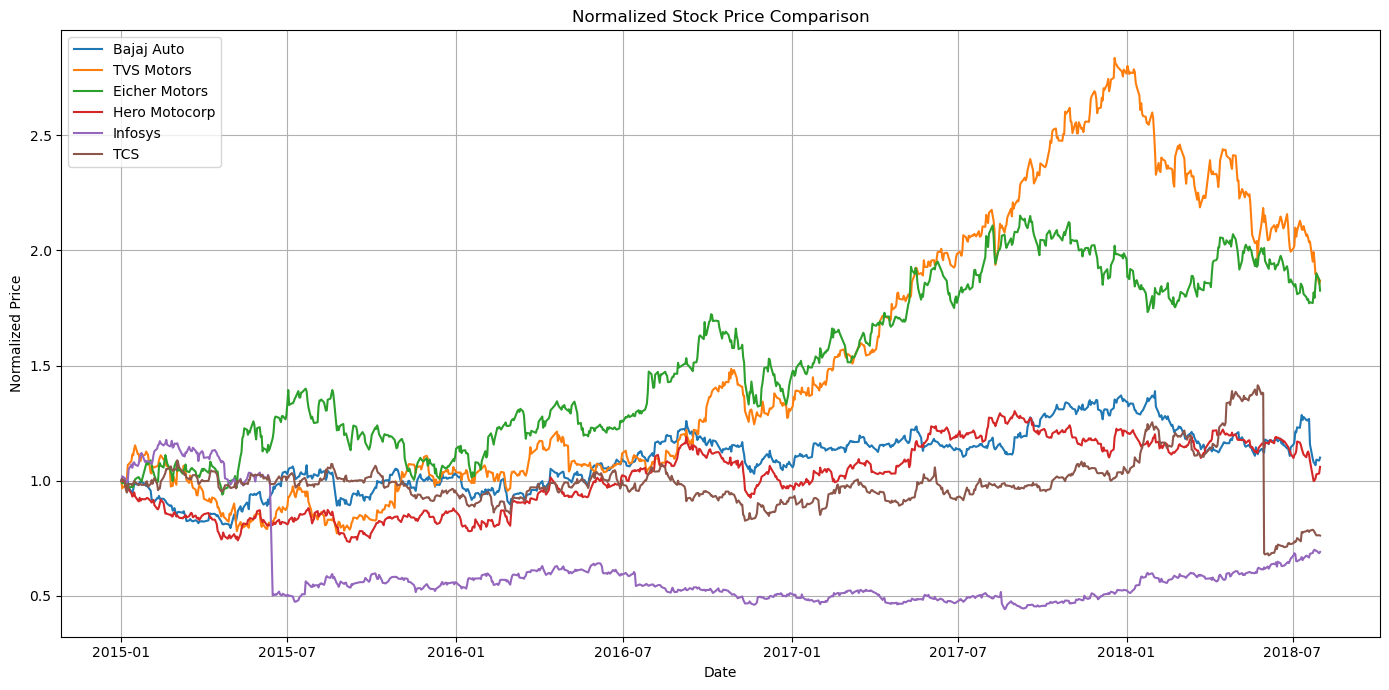

In [6]:
# Plot normalized price comparison
plt.figure(figsize=(14,7))
for col in norm_df.columns[1:]:
    plt.plot(norm_df['Date'], norm_df[col], label=col)

plt.title("Normalized Stock Price Comparison")
plt.xlabel("Date")
plt.ylabel("Normalized Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


--- Correlation Matrix ---
               Bajaj Auto  TVS Motors  Eicher Motors  Hero Motocorp   Infosys  \
Bajaj Auto       1.000000    0.846614       0.856428       0.868266 -0.610335   
TVS Motors       0.846614    1.000000       0.915877       0.870886 -0.376644   
Eicher Motors    0.856428    0.915877       1.000000       0.914825 -0.529617   
Hero Motocorp    0.868266    0.870886       0.914825       1.000000 -0.444997   
Infosys         -0.610335   -0.376644      -0.529617      -0.444997  1.000000   
TCS              0.149587    0.260536       0.182535       0.164220  0.075797   

                    TCS  
Bajaj Auto     0.149587  
TVS Motors     0.260536  
Eicher Motors  0.182535  
Hero Motocorp  0.164220  
Infosys        0.075797  
TCS            1.000000  


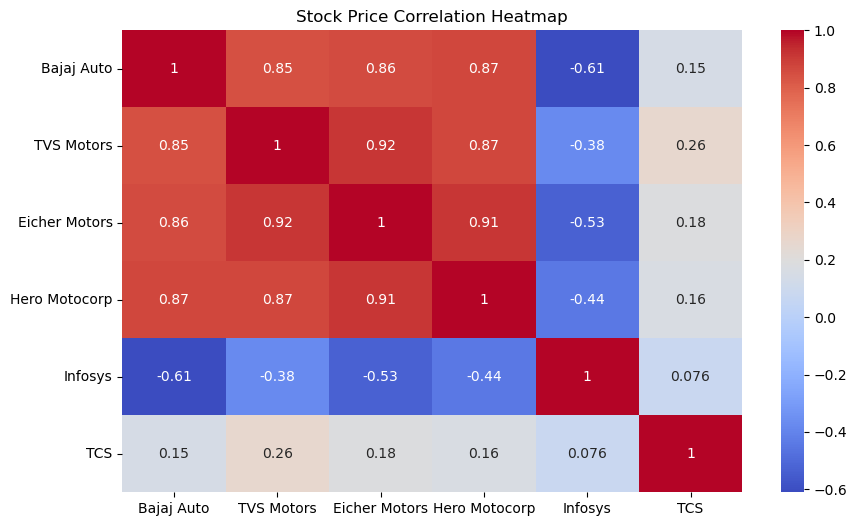

In [7]:
# Correlation matrix
correlation = merged_df.drop(columns='Date').corr()
print("\n--- Correlation Matrix ---")
print(correlation)

plt.figure(figsize=(10,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Stock Price Correlation Heatmap")
plt.show()